In [23]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.stats import linregress

tqdm.pandas()
pd.set_option('display.max_columns', 500)


In [24]:
weeksFirst = [45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
         70, 71, 72, 73, 74, 75, 76, 77]
weeksSecond = [191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
         204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
         224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
         244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
         264, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285]

In [25]:
weekOne = pd.read_pickle('weekOneM.pkl')
weekTwo = pd.read_pickle('weekTwoM.pkl')

In [26]:
weekOne['relative'] = -weekOne['relative']
weekTwo['relative'] = -weekTwo['relative']


In [27]:
weekOne

,min,max,mean,relative
go,0.016124,0.027352,1.894748e-02,0.592559
like,0.008437,0.012427,1.092846e-02,0.365069
good,0.007626,0.013620,9.850298e-03,0.608513
littl,0.006336,0.012332,8.474219e-03,0.707558
one,0.006197,0.008150,6.978812e-03,0.279861
...,...,...,...,...
twizzer,0.000000,0.000007,2.309921e-07,32.000000
blach,0.000000,0.000007,2.309921e-07,32.000000
lagardett,0.000000,0.000007,2.309921e-07,32.000000
dkv,0.000000,0.000007,2.309921e-07,32.000000


In [28]:
# weekOne['meanRelative'] = weekOne.apply(lambda x: x['diff']/x['mean'], axis=1)
# weekTwo['meanRelative'] = weekTwo.apply(lambda x: x['diff']/x['mean'], axis=1)

In [29]:
tf = pd.read_pickle('textAll.pkl').fillna(0.)

In [30]:
one = weekOne[weekOne['mean']>0.0001].sort_values('relative', ascending=False).dropna()
two = weekTwo[weekTwo['mean']>0.0001].sort_values('relative', ascending=False).dropna()

In [31]:
one

,min,max,mean,relative
beep,0.000000,0.005192,0.000188,27.581188
grandpa,0.000000,0.003407,0.000141,24.242535
toulous,0.000000,0.002272,0.000112,20.350285
snake,0.000000,0.001623,0.000111,14.659549
000,0.000023,0.001785,0.000156,11.299674
...,...,...,...,...
sure,0.001056,0.001489,0.001286,0.336320
one,0.006197,0.008150,0.006979,0.279861
time,0.005556,0.007302,0.006462,0.270075
make,0.004281,0.005568,0.004884,0.263673


In [32]:
two

,min,max,mean,relative
accordion,0.000000,0.012876,0.000139,92.821604
chin,0.000000,0.008584,0.000117,73.213589
instrument,0.000000,0.005365,0.000110,48.595881
fridg,0.000000,0.005365,0.000139,38.655757
faith,0.000000,0.004292,0.000141,30.531089
...,...,...,...,...
also,0.003070,0.004783,0.003807,0.450196
see,0.005839,0.008809,0.006877,0.431864
one,0.006472,0.009418,0.007341,0.401317
time,0.005674,0.008117,0.006673,0.366122


<AxesSubplot:title={'center':'Interaction with viewer 2017-2018 by weeks'}>

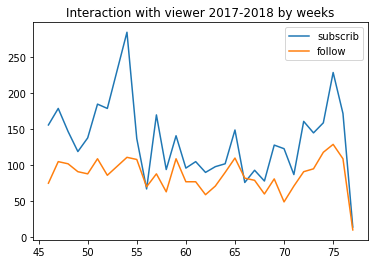

In [36]:
tf.loc[['subscrib','follow'], weeksFirst].transpose().iloc[1:].plot(title="Interaction with viewer 2017-2018 by weeks")

<AxesSubplot:title={'center':'Interaction with viewer 2020-2022 by weeks'}>

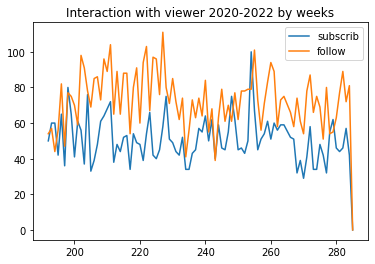

In [37]:
tf.loc[['subscrib','follow'], weeksSecond].transpose().iloc[1:].plot(title="Interaction with viewer 2020-2022 by weeks")

In [9]:
one = weekOne[weekOne['mean']>0.001].sort_values('meanRelative', ascending=False).dropna()
two = weekTwo[weekTwo['mean']>0.001].sort_values('meanRelative', ascending=False).dropna()

<AxesSubplot:title={'center':'Least trending words 2017-2018 by weeks'}>

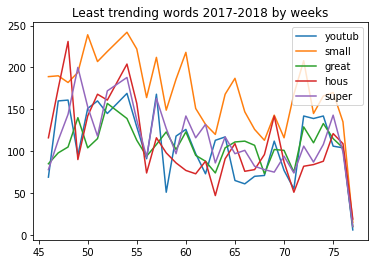

In [10]:
tf.loc[one.index.tolist()[-5:], weeksFirst].transpose().iloc[1:].plot(title="Least trending words 2017-2018 by weeks")

<AxesSubplot:title={'center':'Least trending words 2020-2022 by weeks'}>

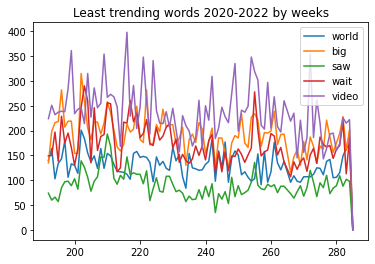

In [11]:
tf.loc[two.index.tolist()[-5:], weeksSecond].transpose().iloc[1:].plot(title="Least trending words 2020-2022 by weeks")

<AxesSubplot:title={'center':'Words relating to covid 2020-2022'}>

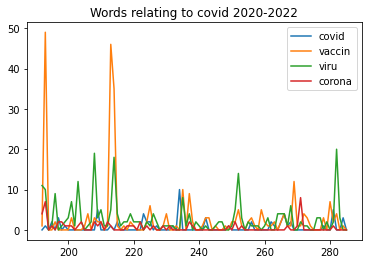

In [14]:
tf.loc[['covid', 'vaccin', 'viru', 'corona'], weeksSecond].transpose().iloc[1:].plot(title="Words relating to covid 2020-2022")

<AxesSubplot:title={'center':'Least trending words 2020-2022 by weeks'}>

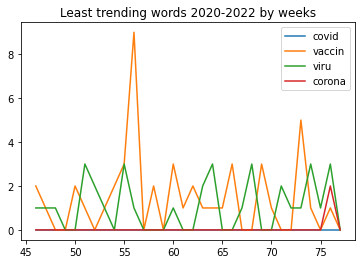

In [13]:
tf.loc[['covid', 'vaccin', 'viru', 'corona'], weeksFirst].transpose().iloc[1:].plot(title="Least trending words 2020-2022 by weeks")